In [35]:
import torch
import cv2
import pytesseract
from IPython.display import Image, display
from ultralytics import YOLO
pytesseract.pytesseract.tesseract_cmd = '/opt/homebrew/bin/tesseract'

In [43]:
# Load YOLO model
model = model = YOLO('/Users/arshith/Downloads/intern_srib/runs3k/detect/train2/weights/best.pt')
# Perform inference
image_path = '/Users/arshith/Downloads/intern_srib/indian dl dataset/01tvDL1.jpeg'
results = model(image_path)

# Extract bounding box coordinates
# for result in results: 
#  boxes = result.boxes

# Load the original image
image = cv2.imread(image_path)

boxes = results[0].boxes.data.cpu().numpy()
#print(boxes)


image 1/1 /Users/arshith/Downloads/intern_srib/indian dl dataset/01tvDL1.jpeg: 416x640 1 Name, 3 Name2s, 1 Num, 1 DOB/reg, 60.5ms
Speed: 1.7ms preprocess, 60.5ms inference, 5.7ms postprocess per image at shape (1, 3, 416, 640)


In [41]:
# import cv2
# import numpy as np

# def preprocess_image(image):
#     # Convert to grayscale
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
#     # Apply Gaussian blur to reduce noise and improve thresholding
#     blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
#     # Use adaptive thresholding to handle different lighting conditions
#     adaptive_thresh = cv2.adaptiveThreshold(
#         blurred, 255, 
#         cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
#         cv2.THRESH_BINARY_INV, 
#         11, 2
#     )
    
#     # Apply morphological transformations to remove small noise and connect text regions
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
#     morph = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_CLOSE, kernel)
    
#     return morph

Kit 5 2017002C251


ATHIRA KURUP
ATHIRA KURUP

07.09.2017



oe
Nie-Transport



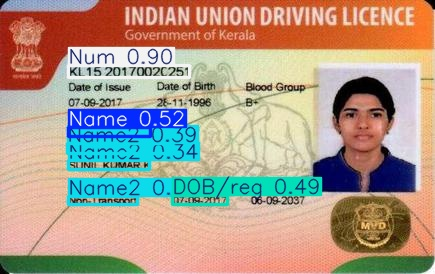

In [44]:
# Function to preprocess image for OCR
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh


extracted_texts = []
for box in boxes:
    x1, y1, x2, y2, conf, cls = box
    cropped_img = image[int(y1-10):int(y2+10), int(x1-10):int(x2+10)] #increasing the size of the cropped image a little.
    #cv2.imshow('Cropped Image', cropped_img)
    preprocessed_img = preprocess_image(cropped_img)
    #cv2.imshow('Preprocessed Image', preprocessed_img)
    
    text = pytesseract.image_to_string(preprocessed_img)
    extracted_texts.append(text)

# Output the extracted texts
for text in extracted_texts:
    print(text)
#results[0].show()

for result in results:
    result.save(filename="res.jpg")

# Display the annotated image in the notebook
display(Image(filename= "res.jpg"))

